sql requirmets

1. Retrieve all records related to the agent named "Rania". 
2. Display the number of calls offered for each day. 
3. List all unique agent names. 
4. Calculate the average ASA (Average Speed of Answer). 
5. Sort the data by the number of abandoned calls in descending order. 
6. Calculate the total forecasted calls and total offered calls for the month of February. 
7. For each agent, calculate the call handling rate as a percentage of handled calls to offered calls. 
8. Using a CASE statement, classify each day's ASA as: - "Excellent" if ASA < 5 - "Good" if ASA is between 5 and 10 - "Poor" if ASA > 10 
9. Show the records where the number of abandoned calls is above the average number of abandoned calls. 
10. Create a SQL View that shows, for each agent, the total number of handled and abandoned calls.

import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sqlalchemy import create_engine
from sqlalchemy import text

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


connect to database

In [2]:
def get_sql_engine():
    """
    Create and return a SQLAlchemy engine for SQL Server connection.
    """
    return create_engine(
        "mssql+pyodbc://@LAPTOP-EBRJ62QL\\SQLSERVER/task"
        "?driver=ODBC+Driver+17+for+SQL+Server"
        "&trusted_connection=yes"
        "&TrustServerCertificate=yes"
    )

engine = get_sql_engine()


# 1. DATA EXTRACTION

In [3]:
def load_agent_performance(engine):
    """
    Load agent performance data from SQL view.
    """
    return pd.read_sql("SELECT * FROM dbo.[Book1]", engine)


df = load_agent_performance(engine)
df.head()


,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project A,2022-02-01,2026-02-22,13473,8393,8381,8380,12,1.689178,14157,Ali
1,Project A,2022-02-02,2026-02-22,13255,5144,5134,5096,10,2.337164,11999,Samir
2,Project A,2022-02-03,2026-02-22,13209,8450,8436,8432,14,1.874822,15816,Rania
3,Project A,2022-02-04,2026-02-22,13002,10883,10614,7376,269,51.207745,543519,Rania
4,Project A,2022-02-05,2026-02-22,12758,11445,11393,11027,52,7.235232,82431,Ahmed


# 1. Retrieve all records related to the agent named "Rania". 


In [4]:

def extract_data(query: str, params = None) -> pd.DataFrame:
    """
    Execute SQL query and return result as pandas DataFrame
    """
    return pd.read_sql(query, engine, params = params)

query = """
select  * 
from dbo.Book1 
where agent_name = ?
"""

df_rania = extract_data(query , params = ('Rania',))
print(df_rania.head())

     Project        Date       Month  Forecasted_Calls  Calls_Offered  \
0  Project A  2022-02-03  2026-02-22             13209           8450   
1  Project A  2022-02-04  2026-02-22             13002          10883   
2  Project A  2022-02-11  2026-02-22             13002           8178   
3  Project A  2022-02-16  2026-02-22             13255           7792   
4  Project A  2022-02-21  2026-02-22             11943           7101   

   Calls_Handled  Calls_Handled_With_in_Thrshold  Calls_Abandon        ASA  \
0           8436                            8432             14   1.874822   
1          10614                            7376            269  51.207745   
2           8166                            8163             12   1.726182   
3           7778                            7758             14   1.845462   
4           7093                            7093              8   1.680107   

   Answer_Time Agent_Name  
0        15816      Rania  
1       543519      Rania  
2       

# 2. Display the number of calls offered for each day. 


In [39]:

query1 = """
select  Date , sum(Calls_Offered) as total_calls   
from dbo.Book1 
group by Date 
"""

df_number_call_offered = extract_data(query1 )
df_number_call_offered

,Date,total_calls
0,2022-02-01,15384
1,2022-02-02,9473
2,2022-02-03,15376
3,2022-02-04,19880
4,2022-02-05,20733
...,...,...
84,2022-04-26,15172
85,2022-04-27,19791
86,2022-04-28,18207
87,2022-04-29,15390


# 3. List all unique agent names. 


In [6]:

query3 = """
select distinct Agent_Name  
from dbo.Book1 
"""

df_unique_agent_name = extract_data(query3)
df_unique_agent_name

,Agent_Name
0,Ahmed
1,Ali
2,Dina
3,Fatma
4,Hassan
5,Huda
6,Khaled
7,Laila
8,Mona
9,Nour


# 4. Calculate the average ASA (Average Speed of Answer). 


In [7]:

query4 = """ 
select  Agent_Name , avg(ASA) as average_unswer
from dbo.Book1
group by Agent_Name
"""

df_average_ASA = extract_data(query4)
df_average_ASA

,Agent_Name,average_unswer
0,Ahmed,7.218926
1,Ali,3.185763
2,Dina,17.974552
3,Fatma,14.012897
4,Hassan,5.974011
5,Huda,15.383876
6,Khaled,6.134755
7,Laila,2.838794
8,Mona,3.974478
9,Nour,5.470680


# 5. Sort the data by the number of abandoned calls in descending order. 


In [8]:

query5 = """ 
select *   
from dbo.Book1 
order by Calls_Abandon  desc
"""

df_num_Calls_Abandon = extract_data(query5)
df_num_Calls_Abandon

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project B,2022-03-05,2022-03-01,15654,17965,14864,5868,3101,180.903397,2688948,Huda
1,Project B,2022-03-06,2022-03-01,17684,21739,19805,11749,1934,89.538498,1773310,Dina
2,Project B,2022-03-04,2022-03-01,12818,15270,13785,8615,1485,103.451942,1426085,Rania
3,Project B,2022-03-03,2022-03-01,16064,18290,16900,6847,1390,79.141594,1337493,Youssef
4,Project B,2022-03-02,2022-03-01,16778,19001,17785,10398,1216,68.290810,1214552,Fatma
...,...,...,...,...,...,...,...,...,...,...,...
262,Project C,2022-02-17,2026-02-22,288,121,121,121,0,1.669421,202,Dina
263,Project C,2022-02-18,2026-02-22,284,133,133,133,0,1.759398,234,Fatma
264,Project C,2022-02-14,2026-02-22,252,111,111,111,0,1.720721,191,Ali
265,Project C,2022-02-12,2026-02-22,281,114,114,112,0,3.008772,343,Huda


# 6. Calculate the total forecasted calls and total offered calls for the month of February. 


In [9]:

query6 = """ 
select Forecasted_Calls , Calls_Offered , Month 
from dbo.Book1 
 where Month = '2026-02-22'
"""

df_total_forcasted_total = extract_data(query6)
df_total_forcasted_total

,Forecasted_Calls,Calls_Offered,Month
0,13473,8393,2026-02-22
1,13255,5144,2026-02-22
2,13209,8450,2026-02-22
3,13002,10883,2026-02-22
4,12758,11445,2026-02-22
...,...,...,...
79,288,127,2026-02-22
80,284,105,2026-02-22
81,281,137,2026-02-22
82,213,130,2026-02-22


## 7. For each agent, calculate the call handling rate as a percentage of handled calls to offered calls. 


In [10]:

query7 = """ 
select Agent_Name ,     SUM(Calls_Handled) * 100.0 / SUM(Calls_Offered) AS handling_rate_percentage 
from dbo.Book1 
group by Agent_Name
"""
df7 = extract_data(query7)
df7


,Agent_Name,handling_rate_percentage
0,Ahmed,99.465269
1,Ali,99.504629
2,Dina,97.411398
3,Fatma,98.217805
4,Hassan,99.340495
5,Huda,97.034957
6,Khaled,99.408798
7,Laila,99.659708
8,Mona,99.433676
9,Nour,98.436190


#### 8. Using a CASE statement, classify each day's ASA as: - "Excellent" if ASA < 5 - "Good" if ASA is between 5 and 10 - "Poor" if ASA > 10 


In [11]:

query8 = """ 
select Date , avg(ASA) as daily_answer ,
case 
when avg(ASA) < 5 then 'Excellent'
when avg(ASA) between 5 and 10 then 'Good'
else 'Poor'
end as classification 
from dbo.Book1
group by Date
"""

df8 = extract_data(query8)
df8

,Date,daily_answer,classification
0,2022-02-01,1.834506,Excellent
1,2022-02-02,2.561721,Excellent
2,2022-02-03,1.808844,Excellent
3,2022-02-04,40.239137,Poor
4,2022-02-05,6.026831,Good
...,...,...,...
84,2022-04-26,2.683266,Excellent
85,2022-04-27,17.004363,Poor
86,2022-04-28,16.642794,Poor
87,2022-04-29,19.254167,Poor


### 9. Show the records where the number of abandoned calls is above the average number of abandoned calls. 


In [12]:

query9 = """ 
select * 
from dbo.Book1 
where Calls_Abandon > (select avg(Calls_Abandon) from dbo.Book1) 
"""

df9 = extract_data(query9)
df9

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project A,2022-02-04,2026-02-22,13002,10883,10614,7376,269,51.207745,543519,Rania
1,Project A,2022-02-26,2026-02-22,12758,13437,12994,7440,443,49.683086,645582,Dina
2,Project B,2022-02-04,2026-02-22,12718,8843,8635,5974,208,51.921829,448345,Fatma
3,Project B,2022-02-26,2026-02-22,12477,11418,11046,6252,372,50.335052,556001,Dina
4,Project A,2022-03-01,2022-03-01,13389,11747,11596,9291,151,17.830891,206767,Samir
5,Project A,2022-03-02,2022-03-01,13134,14735,14092,7895,643,65.165977,918319,Dina
6,Project A,2022-03-03,2022-03-01,12545,13946,13256,5411,690,76.144310,1009369,Rania
7,Project A,2022-03-04,2022-03-01,9970,11663,10884,7211,779,92.360527,1005252,Tariq
8,Project A,2022-03-05,2022-03-01,12209,14504,13476,6228,1028,102.787621,1385166,Youssef
9,Project A,2022-03-06,2022-03-01,13843,15328,14652,9230,676,67.762627,992858,Huda


### 10. Create a SQL View that shows, for each agent, the total number of handled and abandoned calls.


In [13]:


def create_total_details_view(engine):
    query = """
    CREATE OR ALTER VIEW total_details AS
    SELECT Agent_Name, 
           SUM(Calls_Handled) AS total_calls_handled, 
           SUM(Calls_Abandon) AS total_calls_abandoned
    FROM dbo.Book1
    GROUP BY Agent_Name;
    """
    with engine.begin() as conn:
        conn.execute(text(query))

def get_total_details(engine):
    query = "SELECT * FROM total_details"
    return pd.read_sql(query, engine)



In [14]:
# call the function to create the view and get the data
create_total_details_view(engine)
df10 = get_total_details(engine)
df10

,Agent_Name,total_calls_handled,total_calls_abandoned
0,Ahmed,74962,403
1,Ali,148844,741
2,Dina,171785,4565
3,Fatma,91208,1655
4,Hassan,59649,396
5,Huda,149952,4582
6,Khaled,121234,721
7,Laila,54180,185
8,Mona,120095,684
9,Nour,34054,541


# 2.DATA EXPLORATION

In [15]:
df.head()

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project A,2022-02-01,2026-02-22,13473,8393,8381,8380,12,1.689178,14157,Ali
1,Project A,2022-02-02,2026-02-22,13255,5144,5134,5096,10,2.337164,11999,Samir
2,Project A,2022-02-03,2026-02-22,13209,8450,8436,8432,14,1.874822,15816,Rania
3,Project A,2022-02-04,2026-02-22,13002,10883,10614,7376,269,51.207745,543519,Rania
4,Project A,2022-02-05,2026-02-22,12758,11445,11393,11027,52,7.235232,82431,Ahmed


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Project                         267 non-null    object 
 1   Date                            267 non-null    object 
 2   Month                           267 non-null    object 
 3   Forecasted_Calls                267 non-null    int64  
 4   Calls_Offered                   267 non-null    int64  
 5   Calls_Handled                   267 non-null    int64  
 6   Calls_Handled_With_in_Thrshold  267 non-null    int64  
 7   Calls_Abandon                   267 non-null    int64  
 8   ASA                             267 non-null    float64
 9   Answer_Time                     267 non-null    int64  
 10  Agent_Name                      267 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 23.1+ KB


In [ ]:
df.describe().style.format("{:.2f}")


,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time
count,267.00,267.00,267.00,267.00,267.00,267.00,267.00
mean,9127.61,6535.15,6448.85,5950.88,86.30,9.22,92240.00
std,5926.56,5255.98,5118.08,4571.72,287.74,19.59,288387.00
min,213.00,81.00,79.00,75.00,0.00,1.58,172.00
25%,2674.00,1834.50,1824.50,1804.00,5.00,1.88,5325.50
50%,12477.00,6601.00,6592.00,6291.00,12.00,2.74,13374.00
75%,13208.00,8885.00,8809.00,8153.50,42.00,6.75,31497.00
max,17685.00,30381.00,29630.00,22741.00,3101.00,180.90,2688948.00


# Create a boxplot for all numerical columns to visualize outliers


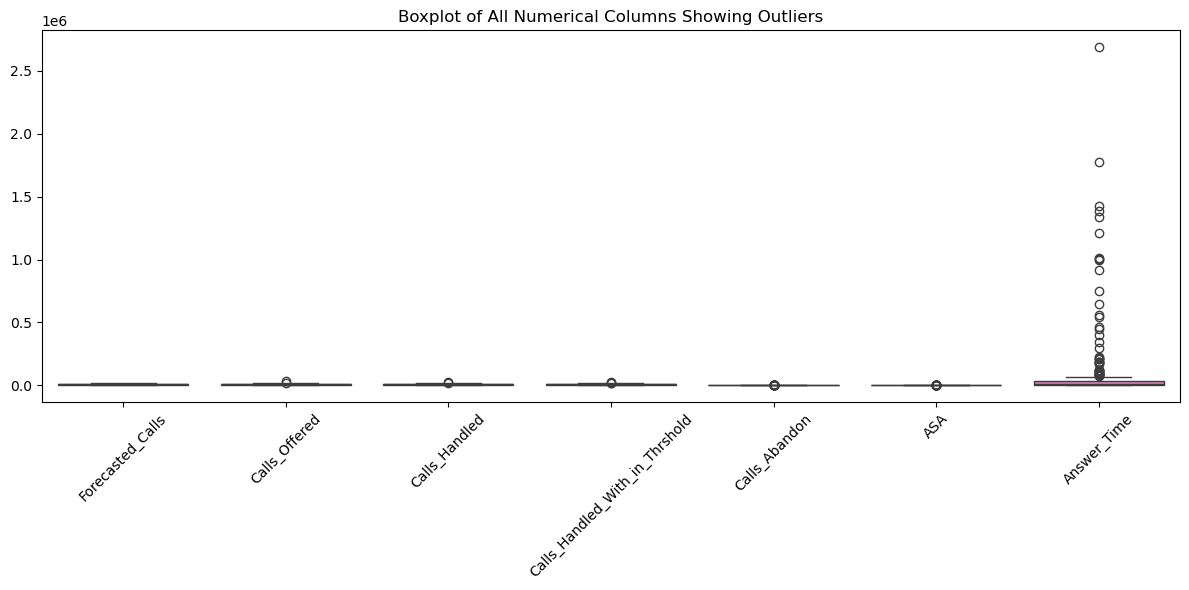

In [18]:
# Set the figure size
plt.figure(figsize=(12, 6))

# Select only numerical columns for plotting
numerical_df = df.select_dtypes(include='number')

# Create the boxplot
sns.boxplot(data=numerical_df)

# Add labels and title
plt.title('Boxplot of All Numerical Columns Showing Outliers')
plt.xticks(rotation=45) # Rotate x-axis labels if needed
plt.tight_layout()

# Save the plot
plt.savefig('all_numerical_boxplot.png')

#  DATA CLEANING

### Correcting datatype for (Date) column
### edit year from 2026 to 2022

In [19]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = pd.to_datetime(df['Month'])

df['Month'] = df['Month'].apply(lambda x: x.replace(year=2022))
df.head()

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project A,2022-02-01,2022-02-22,13473,8393,8381,8380,12,1.689178,14157,Ali
1,Project A,2022-02-02,2022-02-22,13255,5144,5134,5096,10,2.337164,11999,Samir
2,Project A,2022-02-03,2022-02-22,13209,8450,8436,8432,14,1.874822,15816,Rania
3,Project A,2022-02-04,2022-02-22,13002,10883,10614,7376,269,51.207745,543519,Rania
4,Project A,2022-02-05,2022-02-22,12758,11445,11393,11027,52,7.235232,82431,Ahmed


### Correcting numerical Outliers in the 'Answer_Time' column using IQR method

In [20]:
Q1 =   df['Answer_Time'].quantile(0.25)
Q3 = df['Answer_Time'].quantile(0.75)

iqr = Q3 - Q1

lower_bound = Q1 - 1.5 * iqr
upper_bound = Q3 + 1.5* iqr

df_cleaned = df[(df['Answer_Time'] >= lower_bound) & (df['Answer_Time'] <= upper_bound)]
df_cleaned

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name
0,Project A,2022-02-01,2022-02-22,13473,8393,8381,8380,12,1.689178,14157,Ali
1,Project A,2022-02-02,2022-02-22,13255,5144,5134,5096,10,2.337164,11999,Samir
2,Project A,2022-02-03,2022-02-22,13209,8450,8436,8432,14,1.874822,15816,Rania
6,Project A,2022-02-07,2022-02-22,11943,12155,12131,11945,24,2.794741,33903,Fatma
7,Project A,2022-02-08,2022-02-22,13473,11064,11044,10881,20,2.880659,31814,Huda
...,...,...,...,...,...,...,...,...,...,...,...
262,Project C,2022-04-26,2022-04-01,294,164,163,163,1,1.883436,307,Nour
263,Project C,2022-04-27,2022-04-01,291,166,158,145,8,8.411392,1329,Hassan
264,Project C,2022-04-28,2022-04-01,288,149,142,130,7,7.429577,1055,Tariq
265,Project C,2022-04-29,2022-04-01,219,137,136,132,1,4.426471,602,Khaled


In [21]:
df_cleaned['Answer_Time'].max()

67311

<function matplotlib.pyplot.show(close=None, block=None)>

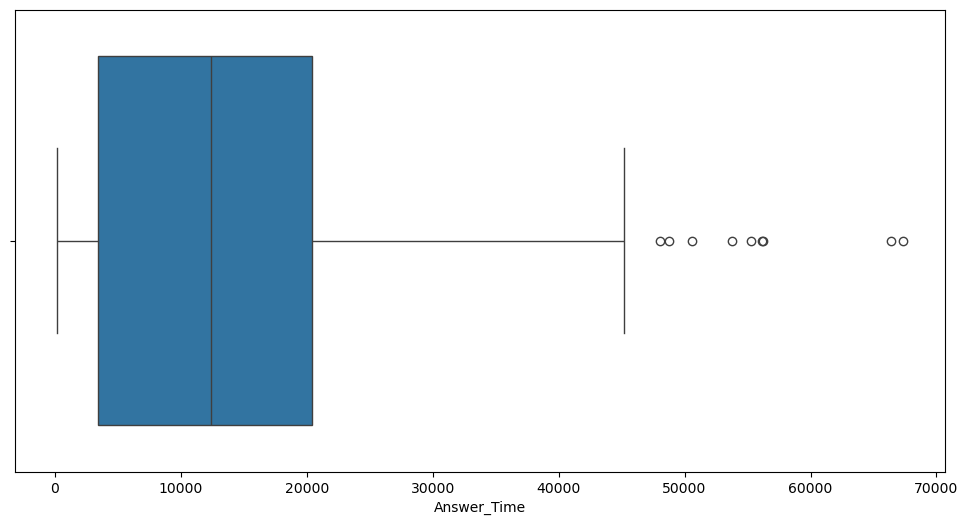

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_cleaned['Answer_Time'])
plt.show

## Data Visualization

##### Plotting the trend of calls offered over time


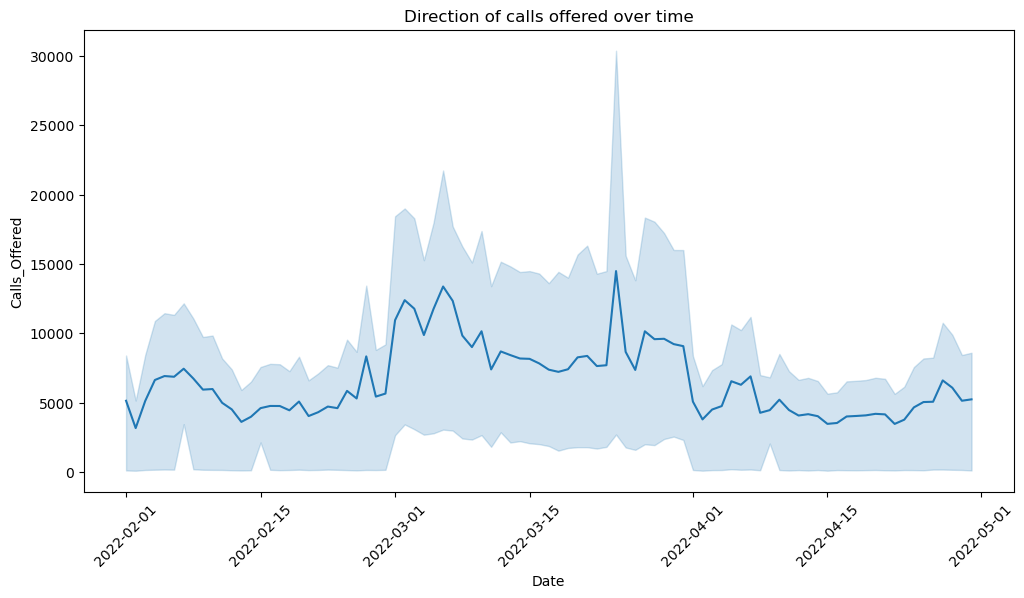

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Calls_Offered')
plt.title('Direction of calls offered over time')
plt.xticks(rotation=45)
plt.show()
# maximun calls offered in a Date is 1000  

Call volume showed a clear upward trend from early February, peaking sharply in mid-to-late March,indicating a period of significantly increased demand. 
Following this spike, volumes declined and stabilized throughout April, 
suggesting the end of a high-activity cycle and a return to normal operational levels.

####  plotting the total calls handled by each agent


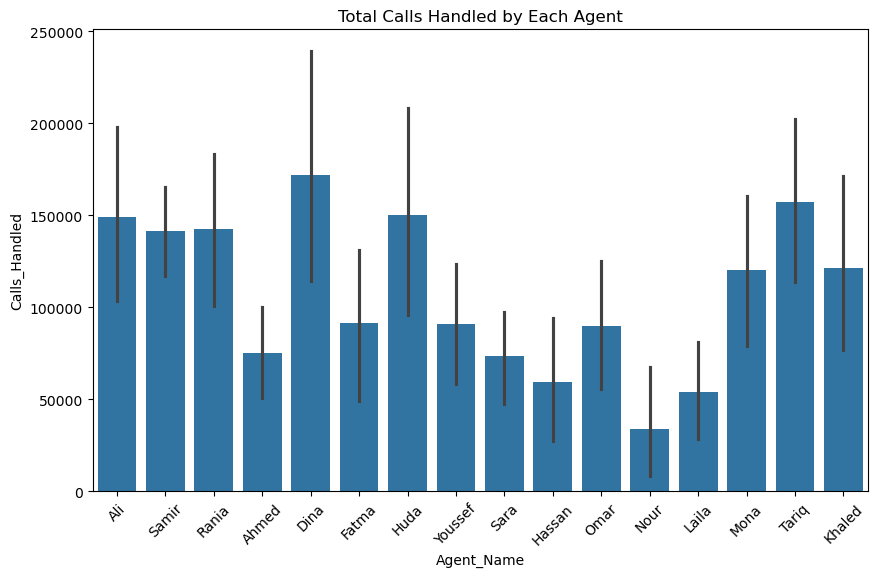

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Agent_Name', y='Calls_Handled', estimator=sum)
plt.title('Total Calls Handled by Each Agent')
plt.xticks(rotation=45)
plt.show()

This chart compares the total call volume by agent, with Dina and Tariq handling the highest volume and Nour the lowest. 
Significant variance exists across all agents, indicating inconsistent workloads or call durations.

#### plotting the distribution of Average Speed of Answer (ASA)


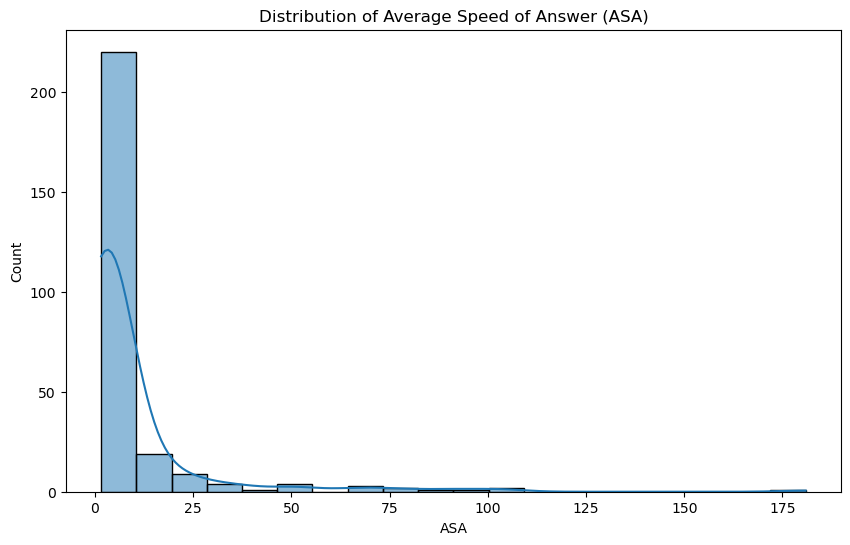

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['ASA'], bins=20, kde=True)
plt.title('Distribution of Average Speed of Answer (ASA)')
plt.show()

Based on this distribution chart , The Average Speed of Answer (ASA) is heavily right-skewed, 
indicating that most calls are answered very quickly (under 25 seconds). However, a small number of calls experience significantly longer wait times, extending up to 175 seconds.

####  plotting the relationship between Calls_Handled and Calls_Abandon


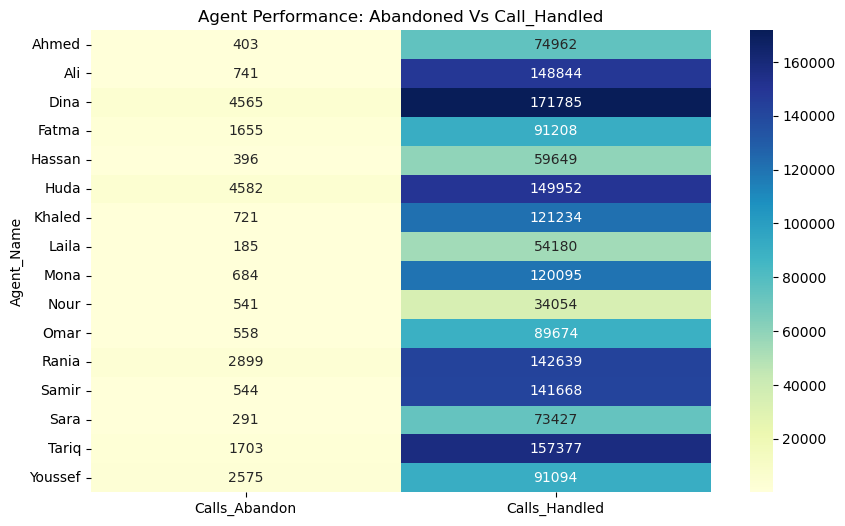

In [ ]:
# Create a pivot table for the heatmap
heatmap_data = df.pivot_table(index='Agent_Name', 
                              values=['Calls_Handled', 'Calls_Abandon'], 
                              aggfunc='sum')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='YlGnBu')
plt.title('Agent Performance: Abandoned Vs Call_Handled')
plt.show()

Based on the heatmap provided,Dina and Huda managed the highest volume of calls but also experienced the highest number of abandonments, suggesting a potential correlation between high workload and call drop-off rates.
Conversely, Laila and Hassan had lower abandonments but also handled significantly fewer calls.

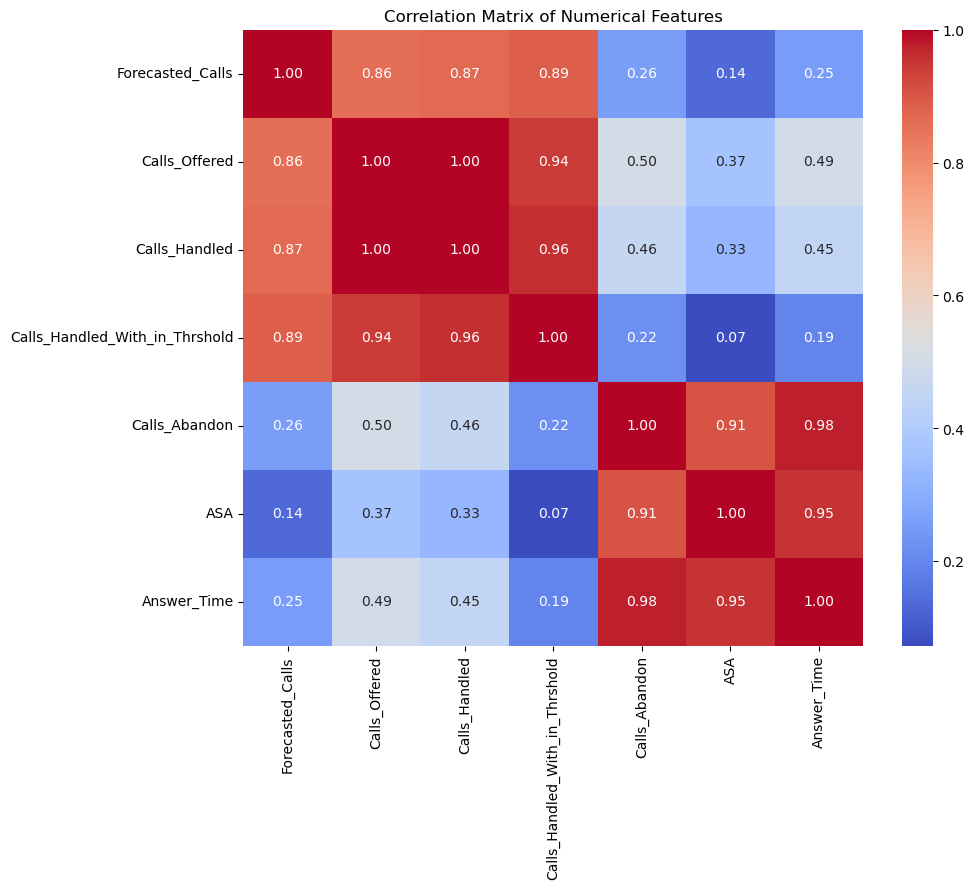

In [27]:
plt.figure(figsize=(10, 8))
correlation_matrix = df.select_dtypes(include='number').corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Based on the correlation matrix provided, Calls_Abondon, ASA (Average Speed of Answer), and Answer_Time show a very strong positive correlation with each other (coefficients > 0.90), meaning as wait times increase, abandonments rise dramatically. 
Conversely, while high call volume (Calls_Handled) correlates strongly with forecasted volume, it does not have a direct, strong positive correlation with abandonment rates, suggesting abandonment is driven more by speed of service than raw volume alone.

### model building

In [28]:
df['Handling_Rate'] = (df['Calls_Handled'] / df['Calls_Offered'])

In [29]:
df.head()

,Project,Date,Month,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time,Agent_Name,Handling_Rate
0,Project A,2022-02-01,2022-02-22,13473,8393,8381,8380,12,1.689178,14157,Ali,0.998570
1,Project A,2022-02-02,2022-02-22,13255,5144,5134,5096,10,2.337164,11999,Samir,0.998056
2,Project A,2022-02-03,2022-02-22,13209,8450,8436,8432,14,1.874822,15816,Rania,0.998343
3,Project A,2022-02-04,2022-02-22,13002,10883,10614,7376,269,51.207745,543519,Rania,0.975283
4,Project A,2022-02-05,2022-02-22,12758,11445,11393,11027,52,7.235232,82431,Ahmed,0.995457


In [30]:
x = df.drop(columns=['Handling_Rate' , 'Project' , 'Agent_Name' , 'Date' , 'Month'])
y = df['Handling_Rate']

In [31]:
x

,Forecasted_Calls,Calls_Offered,Calls_Handled,Calls_Handled_With_in_Thrshold,Calls_Abandon,ASA,Answer_Time
0,13473,8393,8381,8380,12,1.689178,14157
1,13255,5144,5134,5096,10,2.337164,11999
2,13209,8450,8436,8432,14,1.874822,15816
3,13002,10883,10614,7376,269,51.207745,543519
4,12758,11445,11393,11027,52,7.235232,82431
...,...,...,...,...,...,...,...
262,294,164,163,163,1,1.883436,307
263,291,166,158,145,8,8.411392,1329
264,288,149,142,130,7,7.429577,1055
265,219,137,136,132,1,4.426471,602


In [32]:
x_train , x_test ,y_train , y_test = train_test_split(x ,y , test_size = 0.2 , random_state=42)


In [33]:
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [34]:
model.predict(x_test)

array([0.98223203, 0.99360581, 0.9840966 , 0.99968497, 0.99808451,
       0.99534793, 0.98893517, 0.99310402, 1.00112719, 0.89237864,
       1.00111325, 0.98327855, 0.98776668, 0.96771006, 0.99718767,
       0.9953126 , 0.98718679, 0.9971658 , 0.9907871 , 1.00323407,
       1.00188036, 1.00063456, 0.99713815, 0.99974126, 0.99544371,
       1.00101307, 1.00231654, 0.9969539 , 0.90516756, 1.00021396,
       1.00251377, 0.99242858, 0.99911838, 0.99280724, 0.99607177,
       0.99400673, 0.87302046, 0.9995731 , 0.98236657, 0.73540577,
       0.99606092, 0.9747689 , 0.98676297, 0.9931171 , 1.00058258,
       0.98969523, 0.99140409, 0.99655492, 0.99657104, 0.99349802,
       0.98670229, 0.98024489, 1.00239265, 1.00133574])

In [50]:
print(f"Mean Absolute Error: {mean_absolute_error(y_test, model.predict(x_test)):.4f}")

Mean Absolute Error: 0.0068


In [51]:
print("r2 score: ", r2_score(y_test, model.predict(x_test)))

r2 score:  0.7430047787675707
